In [9]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.svm import SVR  
from sklearn.metrics import mean_squared_error

In [11]:
# Load the dataset  

data = pd.read_csv('soil_content.csv')


In [13]:
# Assuming the response variable is 'soil_moisture' and others are features  
X = data.drop('soil_moisture', axis=1).values  # independent variables  
y = data['soil_moisture'].values                # dependent variable

In [15]:
# Creating DataFrame and showing the attributes  
SoilContent_df = pd.DataFrame(data)  
print(SoilContent_df.head())

                                     id                              deviceId  \
0  d0b97daa-54f2-49ff-80dd-fce9865dd159  143313ee-5f65-4454-a7cc-93b1cd028cc6   
1  03ba23ab-ab56-4135-9278-93a661c68a58  143313ee-5f65-4454-a7cc-93b1cd028cc6   
2  667389fe-87ca-49d8-840c-910516b7c40d  143313ee-5f65-4454-a7cc-93b1cd028cc6   
3  818426a0-4fd3-4f51-966c-ad1208ce7e59  143313ee-5f65-4454-a7cc-93b1cd028cc6   
4  a81d8df0-4dec-428b-b653-b31d3027aa9d  143313ee-5f65-4454-a7cc-93b1cd028cc6   

   soil_moisture  soil_temperature      EC  nitrogen  potassium  phosphorous  \
0           39.0              23.4  101.35      0.46      10.83         4.72   
1           39.0              23.3  101.35      0.46      10.83         4.72   
2           39.1              23.3  101.35      0.46      10.83         4.72   
3           39.0              23.3  101.35      0.46      10.83         4.72   
4           39.1              23.4  101.35      0.46      10.83         4.72   

    pH  batteryLevel            

In [ ]:
# Plotting to visualize relationships  
sns.pairplot(SoilContent_df)  
plt.show()

In [43]:
import numpy as np  
import pandas as pd  

# Assuming 'scaled_data' is a NumPy array or DataFrame  
print(f"Number of NaN values in the scaled data: {np.isnan(scaled_data).sum()}")

Number of NaN values in the scaled data: 1961


In [47]:
# If you prefer to drop rows with NaN values  
scaled_data_dropped = scaled_data[~np.isnan(scaled_data).any(axis=1)]

In [17]:
# Summary statistics  
stats = SoilContent_df.describe()  
print(stats)

       soil_moisture  soil_temperature           EC     nitrogen    potassium  \
count    1961.000000       1961.000000  1961.000000  1961.000000  1961.000000   
mean       38.147986         22.928302    90.041040     0.628684     9.666140   
std        22.697685          4.183293    87.792134     1.386840     9.366644   
min         0.000000          0.000000     0.000000     0.000000     0.000000   
25%        29.500000         22.800000    12.000000     0.400000     7.790000   
50%        39.300000         23.400000   102.910000     0.480000    11.000000   
75%        41.100000         24.500000   108.070000     0.500000    11.550000   
max       100.000000         77.200000  1014.130000    10.000000   108.350000   

       phosphorous           pH  batteryLevel  device  
count  1961.000000  1961.000000   1961.000000     0.0  
mean      4.807598     7.453901     89.768485     NaN  
std       5.293692     1.335602      2.070799     NaN  
min       0.000000     0.000000      0.000000 

In [49]:
from sklearn.decomposition import PCA  

# If you used imputation, use 'scaled_data_imputed'  
pca = PCA(n_components=2)  # Reducing to 2 dimensions  
reduced = pca.fit_transform(scaled_data_imputed)  

# Convert to DataFrame for easier visualization  
reduced_df = pd.DataFrame(reduced, columns=['PC1', 'PC2'])  

# Display the first few rows of the reduced DataFrame  
print(reduced_df.head())

        PC1       PC2
0  0.012338 -0.010589
1  0.012276 -0.010568
2  0.013208 -0.010867
3  0.012276 -0.010568
4  0.013269 -0.010888


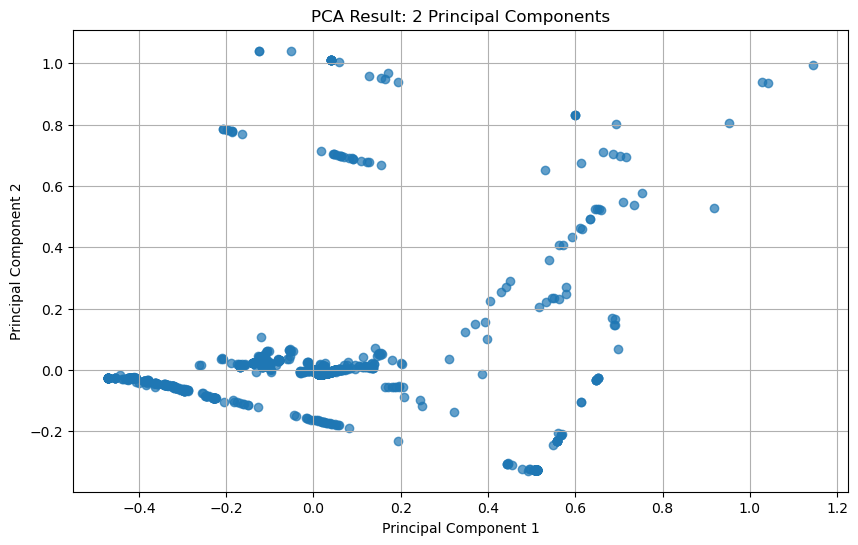

In [51]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(10, 6))  
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], alpha=0.7)  
plt.title('PCA Result: 2 Principal Components')  
plt.xlabel('Principal Component 1')  
plt.ylabel('Principal Component 2')  
plt.grid()  
plt.show()

Number of NaN values in numeric data: 1961
        PC1       PC2
0  0.012338 -0.010589
1  0.012276 -0.010568
2  0.013208 -0.010867
3  0.012276 -0.010568
4  0.013269 -0.010888


C:\Users\billa\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['device']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


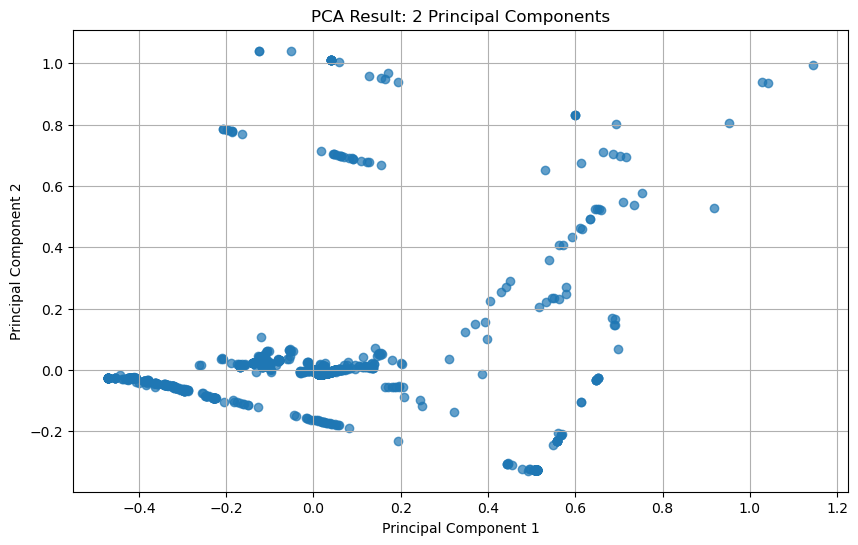

In [55]:
import pandas as pd  
import numpy as np  
from sklearn.preprocessing import MinMaxScaler  
from sklearn.decomposition import PCA  
from sklearn.impute import SimpleImputer  
import matplotlib.pyplot as plt  

# Load your dataset (ensure the .csv path fits your context)  
# SoilContent_df = pd.read_excel('path_to_your_file.xlsx')  

# Select only numeric columns  
numeric_df = SoilContent_df.select_dtypes(include=[np.number])  

# Check for NaN values  
print(f"Number of NaN values in numeric data: {numeric_df.isnull().sum().sum()}")  

# Handle NaN values (you can choose to fill with mean, median, drop, etc.)  
imputer = SimpleImputer(strategy='mean')  # or median  
numeric_df_imputed = imputer.fit_transform(numeric_df)  

# Scale the numeric data  
scaler = MinMaxScaler()  
scaled_data = scaler.fit_transform(numeric_df_imputed)  

# Apply PCA  
pca = PCA(n_components=2)  # Reducing to 2 dimensions  
reduced = pca.fit_transform(scaled_data)  

# Convert to DataFrame for easier visualization  
reduced_df = pd.DataFrame(reduced, columns=['PC1', 'PC2'])  

# Display the first few rows of the reduced DataFrame  
print(reduced_df.head())  

# Visualize PCA Result  
plt.figure(figsize=(10, 6))  
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], alpha=0.7)  
plt.title('PCA Result: 2 Principal Components')  
plt.xlabel('Principal Component 1')  
plt.ylabel('Principal Component 2')  
plt.grid()  
plt.show()

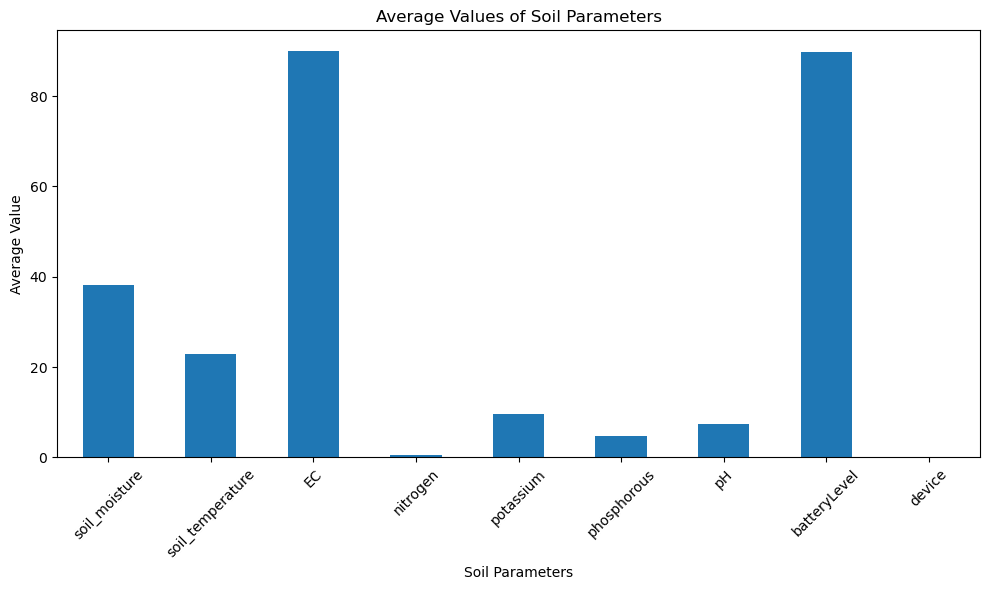

In [59]:
import pandas as pd  
import matplotlib.pyplot as plt  

# Assuming SoilContent_df already exists  

# Calculate the average values for numeric parameters only  
avg_values = SoilContent_df.select_dtypes(include=[np.number]).mean()  

# Set the figure size for better visualization  
plt.figure(figsize=(10, 6))  

# Plot average values  
avg_values.plot(kind='bar')  

# Add title and labels  
plt.title('Average Values of Soil Parameters')  
plt.xlabel('Soil Parameters')  
plt.ylabel('Average Value')  

# Show the plot  
plt.xticks(rotation=45)  # Rotate x labels for better readability  
plt.tight_layout()  # Adjust layout to accommodate labels  
plt.show()

In [63]:
# Splitting the dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

id                   object
deviceId             object
soil_moisture       float64
soil_temperature    float64
EC                  float64
nitrogen            float64
potassium           float64
phosphorous         float64
pH                  float64
batteryLevel          int64
createdAt            object
updatedAt            object
device              float64
dtype: object


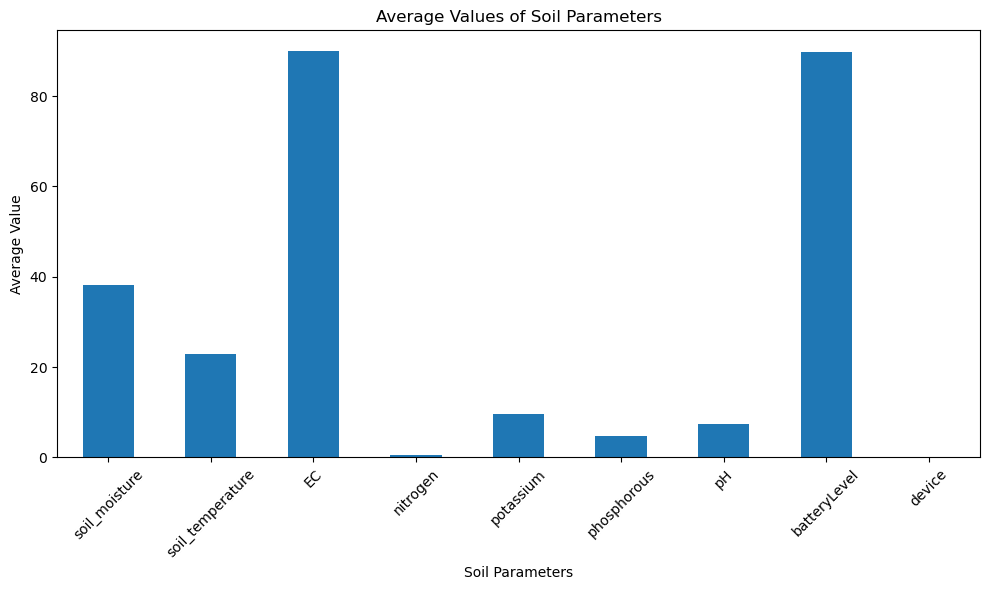

In [67]:
import pandas as pd  
import matplotlib.pyplot as plt  

# Assuming SoilContent_df already exists  

# First, check the data types of the columns  
print(SoilContent_df.dtypes)  

# Select numeric columns only to calculate mean  
numeric_df = SoilContent_df.select_dtypes(include=[np.number])  

# Calculate the average values  
avg_values = numeric_df.mean()  

# Set figure size for better visualization  
plt.figure(figsize=(10, 6))  

# Plot average values  
avg_values.plot(kind='bar')  

# Add title and labels  
plt.title('Average Values of Soil Parameters')  
plt.xlabel('Soil Parameters')  
plt.ylabel('Average Value')  

# Show the plot  
plt.xticks(rotation=45)  # Rotate x labels for better readability  
plt.tight_layout()       # Adjust layout  
plt.show()

In [85]:
import numpy as np  
import pandas as pd  
from sklearn.impute import SimpleImputer  

# Assuming X_train and X_test are originally DataFrames  
X_train_df = pd.DataFrame(X_train) if isinstance(X_train, np.ndarray) else X_train  
X_test_df = pd.DataFrame(X_test) if isinstance(X_test, np.ndarray) else X_test  

# Check the DataFrame structure  
print("X_train structure:\n", X_train_df.head())  
print("X_test structure:\n", X_test_df.head())  

# Check data types  
print(X_train_df.dtypes)  
print(X_test_df.dtypes)  

# Select only numeric columns  
X_train_numeric = X_train_df.select_dtypes(include=[np.number])  
X_test_numeric = X_test_df.select_dtypes(include=[np.number])  

# Ensure that the numeric DataFrames are not empty  
if X_train_numeric.empty:  
    print("Warning: X_train_numeric is empty!")  
if X_test_numeric.empty:  
    print("Warning: X_test_numeric is empty!")  

# Create an imputer that fills missing values with the mean for numeric data  
imputer = SimpleImputer(strategy='mean')  

# Fit the imputer on the numeric training data and transform both train and test data  
if not X_train_numeric.empty:  
    X_train_imputed_numeric = imputer.fit_transform(X_train_numeric)  
else:  
    X_train_imputed_numeric = np.empty((X_train.shape[0], 0))  # Create an empty array with appropriate shape  

if not X_test_numeric.empty:  
    X_test_imputed_numeric = imputer.transform(X_test_numeric)  
else:  
    X_test_imputed_numeric = np.empty((X_test.shape[0], 0))  # Create an empty array with appropriate shape  

# If necessary, join back with the original DataFrame for any non-numeric values  
X_train_final = pd.concat([pd.DataFrame(X_train_imputed_numeric, columns=X_train_numeric.columns),   
                            X_train_df.drop(X_train_numeric.columns, axis=1)],   
                           axis=1)  
X_test_final = pd.concat([pd.DataFrame(X_test_imputed_numeric, columns=X_test_numeric.columns),   
                           X_test_df.drop(X_test_numeric.columns, axis=1)],   
                          axis=1)  

# For categorical data, you can use a different imputer strategy if needed  
imputer_categorical = SimpleImputer(strategy='most_frequent')  

# Impute categorical data (if present)  
cat_cols_train = X_train_df.select_dtypes(exclude=[np.number]).columns  
cat_cols_test = X_test_df.select_dtypes(exclude=[np.number]).columns  

# Ensure categorical columns are not empty before imputing  
if not cat_cols_train.empty:  
    print("Imputing categorical columns in training data:", cat_cols_train)  
    
    # Avoid attempting to fit on empty columns  
    try:  
        X_train_final[cat_cols_train] = imputer_categorical.fit_transform(X_train_final[cat_cols_train])  
    except ValueError as e:  
        print(f"Error in imputing categorical columns: {e}")  
        # Handling empty columns: Fill them with a placeholder value if required  
        for col in cat_cols_train:  
            if X_train_final[col].isnull().all():  # Check if the column is all null  
                X_train_final[col] = 'unknown'  # Or any relevant placeholder value  

if not cat_cols_test.empty:  
    print("Imputing categorical columns in testing data:", cat_cols_test)  

    # Avoid attempting to fit on empty columns  
    try:  
        X_test_final[cat_cols_test] = imputer_categorical.transform(X_test_final[cat_cols_test])  
    except ValueError as e:  
        print(f"Error in imputing categorical columns: {e}")  
        # Handling empty columns: Fill them with a placeholder value if required  
        for col in cat_cols_test:  
            if X_test_final[col].isnull().all():  # Check if the column is all null  
                X_test_final[col] = 'unknown'  # Or any relevant placeholder value  

# Convert back to NumPy array if required  
X_train = X_train_final.values  
X_test = X_test_final.values  

# Optional: Print final shapes to confirm success  
print("Final shapes: X_train:", X_train.shape, ", X_test:", X_test.shape)

X_train structure:
                                      0                                     1   \
0  a0ee03af-6dd7-4d05-b4ed-6eb6daeee165  143313ee-5f65-4454-a7cc-93b1cd028cc6   
1  3e127c2a-ac93-42d4-bad5-6feaaa34955d  0d9a67e8-ac21-4196-bf43-9a8bb65948e2   
2  cca49066-d713-4607-9b2c-dda4368ab830  0d9a67e8-ac21-4196-bf43-9a8bb65948e2   
3  561aaf32-f3bb-42a1-976e-280908930fc3  143313ee-5f65-4454-a7cc-93b1cd028cc6   
4  b0059065-99f8-4c59-9d44-08901664b339  143313ee-5f65-4454-a7cc-93b1cd028cc6   

     2       3     4      5     6    7   8                    9   \
0  22.7  104.48  0.48  11.16  4.86  8.2  90  10-05-2023 08:34:55   
1  20.8     0.0   0.0    0.0   0.0  6.8  90  10-05-2023 09:09:01   
2  22.9  121.52  0.55  12.98  5.65  6.2  89  10-05-2023 12:14:44   
3  24.2  137.89  0.63  14.73  6.42  8.3  90  09-05-2023 21:44:56   
4  24.8  104.48  0.48  11.16  4.86  8.4  90  09-05-2023 15:25:48   

                    10   11  
0  10-05-2023 08:34:55  NaN  
1  10-05-2023 09:09:01  

C:\Users\billa\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [11]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
C:\Users\billa\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [11]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [87]:
print("Number of classes in the target variable:", len(np.unique(y)))

Number of classes in the target variable: 304


C:\Users\billa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


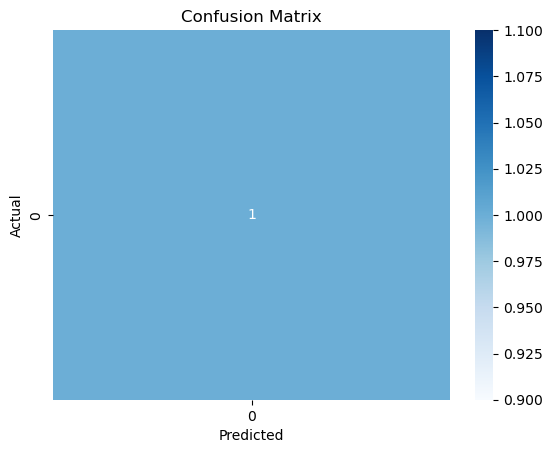

In [97]:
import pandas as pd  
import numpy as np  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import confusion_matrix  
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder  

# Simulating some data for explanation (replace this with your actual data)  
df = pd.DataFrame({  
    'uuid': ['a0ee03af-6dd7-4d05-b4ed-6eb6daeee165', 'a0ee03af-6dd7-4d05-b4ed-6eb6daeee166', 'a0ee03af-6dd7-4d05-b4ed-6eb6daeee167'],  
    'feature_1': [1, 2, 3],  
    'feature_2': ['cat', 'dog', 'cat'],  
    'target': [0, 1, 0]  # Ensure this is categorical  
})  

# Split data into features and target  
X = df.drop(columns=['target'])  
y = df['target']  # Ensure this is categorical and not mixed with identifiers or inappropriate labels  

# Split the data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Drop the uuid column as it does not provide useful information for classification  
X_train = X_train.drop(columns=['uuid'])  
X_test = X_test.drop(columns=['uuid'])  

# Identify categorical columns  
categorical_cols = X_train.select_dtypes(include=['object']).columns  

# Encodings  
encoder = LabelEncoder()  
for col in categorical_cols:  
    X_train[col] = encoder.fit_transform(X_train[col].astype(str))  
    X_test[col] = encoder.transform(X_test[col].astype(str))  

# Now fit the model with the processed data  
model = DecisionTreeClassifier()  
model.fit(X_train, y_train)  # Fit the model  
y_pred = model.predict(X_test)  # Make predictions  

# Display confusion matrix  
cm = confusion_matrix(y_test, y_pred)  # Here y_test should be categorical  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Use cmap to make the heatmap visually clearer  
plt.title('Confusion Matrix')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show()

KNN Accuracy: 0.0


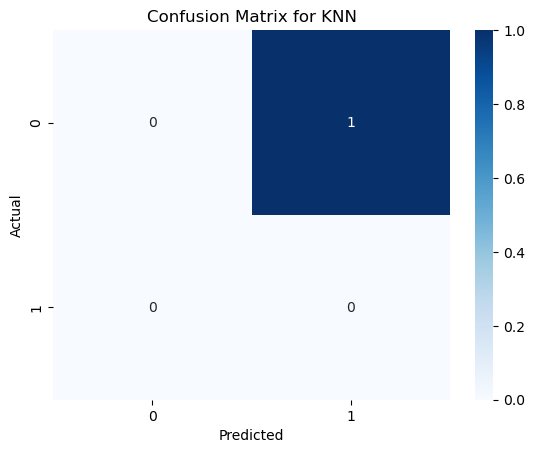

In [103]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score, confusion_matrix  
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder  

# Simulating data (replace this with your actual df)  
df = pd.DataFrame({  
    'uuid': ['a0ee03af-6dd7-4d05-b4ed-6eb6daeee165',   
             'a0ee03af-6dd7-4d05-b4ed-6eb6daeee166',   
             'a0ee03af-6dd7-4d05-b4ed-6eb6daeee167'],  
    'feature_1': [1, 2, 3],  
    'feature_2': ['cat', 'dog', 'cat'],  # Categorical feature  
    'target': [0, 1, 0]  
})  

# Step 1: Drop non-predictive columns  
df = df.drop(columns=['uuid'])  

# Step 2: Identify the target and features  
X = df.drop(columns=['target'])  
y = df['target']  

# Step 3: Encode categorical features  
categorical_cols = X.select_dtypes(include=['object']).columns  
for col in categorical_cols:  
    # Use Label Encoding for binary/ordinal features  
    if X[col].nunique() <= 2:  
        le = LabelEncoder()  
        X[col] = le.fit_transform(X[col])  
    else:  
        # Use One-Hot Encoding for nominal features  
        X = pd.get_dummies(X, columns=[col], drop_first=True)  

# Step 4: Split dataset into training and testing  
# Changed test_size to 0.33 to ensure enough training samples  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  

# Step 5: KNN Classifier  
knn = KNeighborsClassifier(n_neighbors=1)  # Set neighbors to 1 for small datasets  
knn.fit(X_train, y_train)  
y_pred_knn = knn.predict(X_test)  

# Step 6: Accuracy  
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))  

# Step 7: Confusion Matrix  
cm_knn = confusion_matrix(y_test, y_pred_knn)  
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')  
plt.title('Confusion Matrix for KNN')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show()

Decision Tree Accuracy: 1.0


C:\Users\billa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


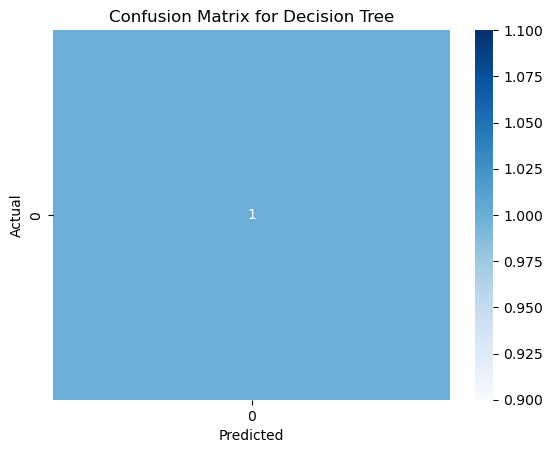

In [105]:
from sklearn.tree import DecisionTreeClassifier  

# Decision Tree Classifier  
dt = DecisionTreeClassifier()  
dt.fit(X_train, y_train)  
y_pred_dt = dt.predict(X_test)  

# Accuracy  
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))  

# Confusion Matrix  
cm_dt = confusion_matrix(y_test, y_pred_dt)  
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')  
plt.title('Confusion Matrix for Decision Tree')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show()

Perceptron Accuracy: 1.0


C:\Users\billa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


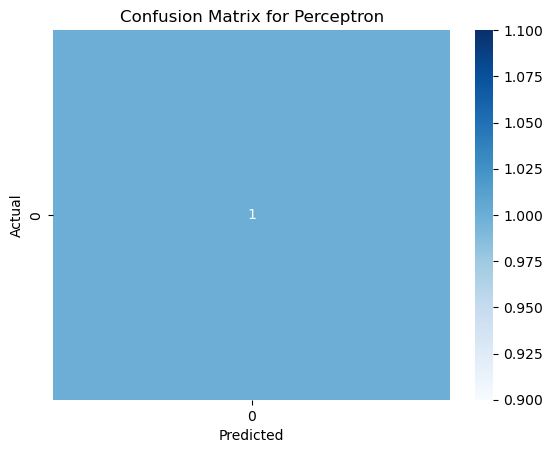

In [107]:
from sklearn.linear_model import Perceptron  

# Standard Perceptron  
perceptron = Perceptron(max_iter=1000, tol=1e-3)  
perceptron.fit(X_train, y_train)  
y_pred_perceptron = perceptron.predict(X_test)  

# Accuracy  
print("Perceptron Accuracy:", accuracy_score(y_test, y_pred_perceptron))  

# Confusion Matrix  
cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)  
sns.heatmap(cm_perceptron, annot=True, fmt='d', cmap='Blues')  
plt.title('Confusion Matrix for Perceptron')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show()

SVM Accuracy: 0.0


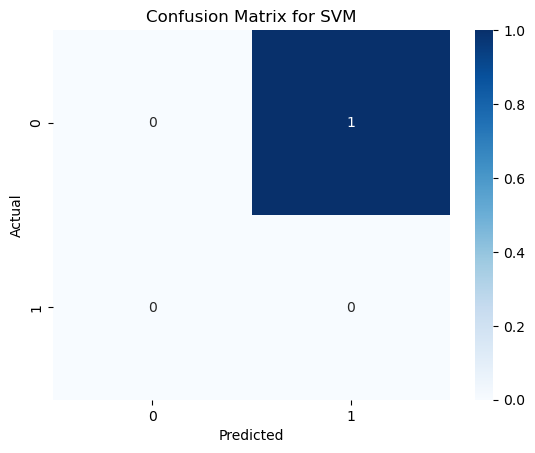

In [109]:
from sklearn.svm import SVC  

# SVM Classifier  
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)  
y_pred_svm = svm_model.predict(X_test)  

# Accuracy  
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))  

# Confusion Matrix  
cm_svm = confusion_matrix(y_test, y_pred_svm)  
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')  
plt.title('Confusion Matrix for SVM')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show()

Neural Network Accuracy: 0.0


C:\Users\billa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


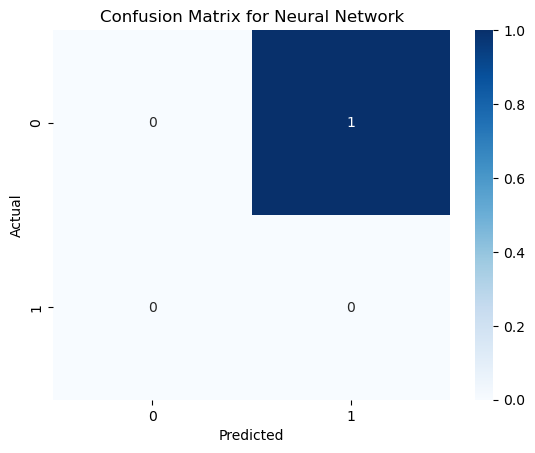

In [111]:
from sklearn.neural_network import MLPClassifier  

# Neural Network  
nn_model = MLPClassifier(hidden_layer_sizes=(), max_iter=1000)  
nn_model.fit(X_train, y_train)  
y_pred_nn = nn_model.predict(X_test)  

# Accuracy  
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))  

# Confusion Matrix  
cm_nn = confusion_matrix(y_test, y_pred_nn)  
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')  
plt.title('Confusion Matrix for Neural Network')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show()

In [113]:
# Save confusion matrix plot  
plt.savefig('confusion_matrix_knn.png')

<Figure size 640x480 with 0 Axes>